In [1]:
import geopandas as gpd
import pandas as pd

In [20]:
# load census tracts
census_tracts = gpd.read_file("nyct2020_23a/nyct2020.shp")
census_tracts = census_tracts.to_crs("EPSG:4326")
census_tracts.head()


,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,GEOID,Shape_Leng,Shape_Area,geometry
0,1,1,Manhattan,000100,1000100,NaN,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061000100,11023.048501,1.844421e+06,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ..."
1,2.01,1,Manhattan,000201,1000201,NaN,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000201,4754.495247,9.723121e+05,"POLYGON ((-73.98450 40.70951, -73.98655 40.709..."
2,6,1,Manhattan,000600,1000600,NaN,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000600,6976.286456,2.582705e+06,"POLYGON ((-73.99022 40.71440, -73.98934 40.714..."
3,14.01,1,Manhattan,001401,1001401,NaN,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001401,5075.332000,1.006117e+06,"POLYGON ((-73.98837 40.71645, -73.98754 40.716..."
4,14.02,1,Manhattan,001402,1001402,NaN,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001402,4459.156019,1.226206e+06,"POLYGON ((-73.98507 40.71908, -73.98423 40.718..."


<Axes: >

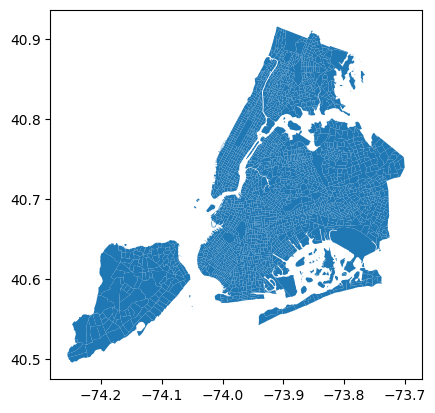

In [21]:
census_tracts.plot()

In [22]:
# load bike lanes
bikelanes_raw = pd.read_csv("bikelanesunfil.csv", on_bad_lines='skip')

# remove malformed line
bikelanes_raw = bikelanes_raw[~bikelanes_raw.the_geom.str.contains("MULTILI717274751")]

# convert strong to geom
bikelanes_raw['the_geom'] = gpd.GeoSeries.from_wkt(bikelanes_raw['the_geom'],crs="EPSG:4326")
bikelanes = gpd.GeoDataFrame(bikelanes_raw, geometry='the_geom')

# display
bikelanes.head()

,the_geom,segmentid,Shape_Le_1,boro,street,fromstreet,tostreet,onoffst,facilitycl,allclasses,bikedir,lanecount,ft_facilit,tf_facilit,ft2facilit,tf2facilit,comments
0,"MULTILINESTRING ((-74.24993 40.50088, -74.2496...",53,131.771990,5,CONFERENCE HOUSE PARK GREENWAY,HYLAN BLVD,SWINNERTON ST,OFF,I,I,2,2,Greenway,Greenway,NaN,NaN,NaN
1,"MULTILINESTRING ((-74.24916 40.49872, -74.2493...",57,268.689582,5,CONFERENCE HOUSE PARK GREENWAY,HYLAN BLVD,SWINNERTON ST,OFF,I,I,2,2,Greenway,Greenway,NaN,NaN,NaN
2,"MULTILINESTRING ((-74.24935 40.49944, -74.2496...",59,420.193253,5,CONFERENCE HOUSE PARK GREENWAY,HYLAN BLVD,SWINNERTON ST,OFF,I,I,2,2,Greenway,Greenway,NaN,NaN,NaN
3,"MULTILINESTRING ((-74.25185 40.50281, -74.2517...",61,238.242198,5,CONFERENCE HOUSE PARK GREENWAY,HYLAN BLVD,SWINNERTON ST,OFF,I,I,2,2,Greenway,Greenway,NaN,NaN,NaN
4,"MULTILINESTRING ((-74.25133 40.50229, -74.2499...",64,646.293832,5,CONFERENCE HOUSE PARK GREENWAY,HYLAN BLVD,SWINNERTON ST,OFF,I,I,2,2,Greenway,Greenway,NaN,NaN,NaN


<Axes: >

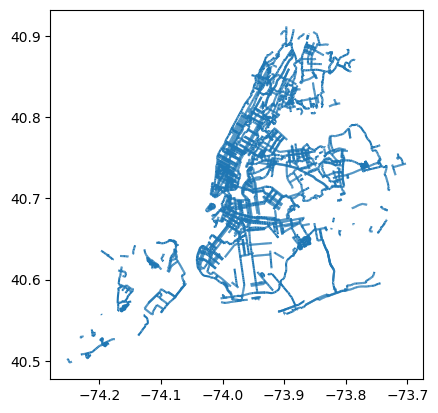

In [23]:
bikelanes.plot()

In [26]:
# spatial join
census_tracts.sjoin(bikelanes, how="inner", predicate='intersects')

,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,...,onoffst,facilitycl,allclasses,bikedir,lanecount,ft_facilit,tf_facilit,ft2facilit,tf2facilit,comments
1,2.01,1,Manhattan,000201,1000201,NaN,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),...,ON,I,I,2,2,Protected Path,Protected Path,NaN,NaN,NaN
1,2.01,1,Manhattan,000201,1000201,NaN,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),...,OFF,I,I,2,2,Greenway,Greenway,NaN,NaN,NaN
2305,2.02,1,Manhattan,000202,1000202,NaN,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),...,OFF,I,I,2,2,Greenway,Greenway,NaN,NaN,NaN
1,2.01,1,Manhattan,000201,1000201,NaN,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),...,ON,II,II,2,2,Standard,Standard,NaN,NaN,NaN
2305,2.02,1,Manhattan,000202,1000202,NaN,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),...,ON,II,II,2,2,Standard,Standard,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2324,687,4,Queens,068700,4068700,NaN,Rego Park,QN0601,QN06,QN06 Forest Hills-Rego Park (CD 6 Approximation),...,ON,I,I,2,2,Protected Path,Protected Path,NaN,NaN,NaN
2324,687,4,Queens,068700,4068700,NaN,Rego Park,QN0601,QN06,QN06 Forest Hills-Rego Park (CD 6 Approximation),...,ON,I,I,2,2,Protected Path,Protected Path,NaN,NaN,NaN
2324,687,4,Queens,068700,4068700,NaN,Rego Park,QN0601,QN06,QN06 Forest Hills-Rego Park (CD 6 Approximation),...,ON,I,I,2,2,Protected Path,Protected Path,NaN,NaN,NaN
2324,687,4,Queens,068700,4068700,NaN,Rego Park,QN0601,QN06,QN06 Forest Hills-Rego Park (CD 6 Approximation),...,ON,I,I,2,2,Protected Path,Protected Path,NaN,NaN,NaN
